Quinn O'Connor
 - Reid Henry Norton
 - Jack Joiner
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd 
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [ ]:
X = mushrooms_df['type']
y = mushrooms_df.drop('type', axis=1)





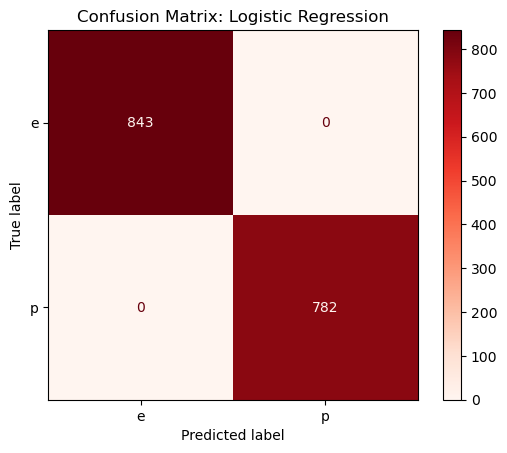

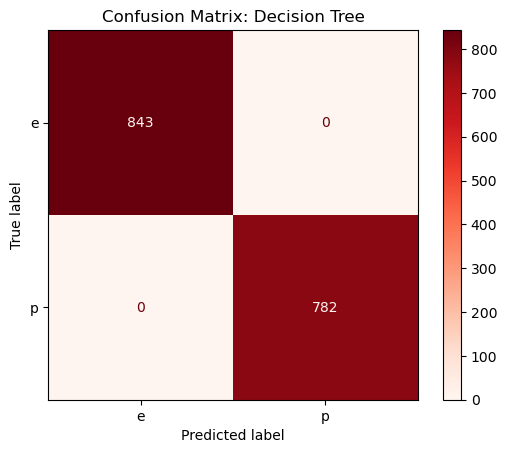

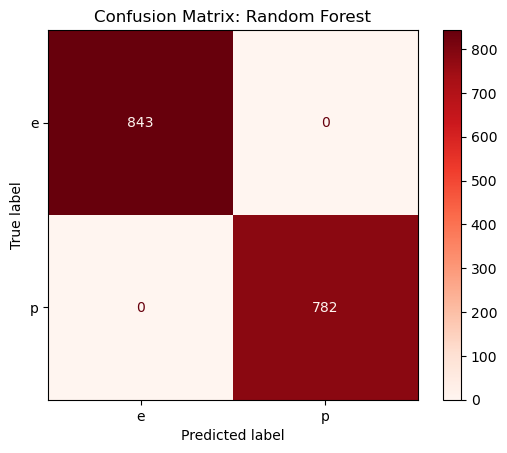


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


Classification Report for Random Forest:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00    

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Drop target column and separate features
X = mushrooms_df.drop(columns=['type'])

# Define ordinal features and encoders
ordinal_features = ['gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'bruises', 'ring_number']
ord_enc = OrdinalEncoder()

# Define categorical features and encoders
cat_features = [col for col in X.columns if col not in ordinal_features]
hot_enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Combine encoders
ct = ColumnTransformer(transformers=[
    ('hotenc', hot_enc, cat_features),
    ('ordenc', ord_enc, ordinal_features)
], remainder='passthrough', verbose_feature_names_out=False)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, mushrooms_df['type'], test_size=0.2, random_state=42)

# Transform features
X_train_transform = ct.fit_transform(X_train)
X_test_transform = ct.transform(X_test)

# Encode target
label_enc = LabelEncoder()
y_train_trans = label_enc.fit_transform(y_train)
y_test_trans = label_enc.transform(y_test)

# Logistic Regression
log_reg = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
log_reg.fit(X_train_transform, y_train_trans)
y_pred_log_reg = log_reg.predict(X_test_transform)

# Decision Tree
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt.fit(X_train_transform, y_train_trans)
y_pred_dt = dt.best_estimator_.predict(X_test_transform)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)
rf.fit(X_train_transform, y_train_trans)
y_pred_rf = rf.best_estimator_.predict(X_test_transform)

# Model predictions dictionary
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

# Display confusion matrices
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test_trans, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
    disp.plot(cmap='Reds')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Classification reports
for model_name, y_pred in models.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test_trans, y_pred, target_names=label_enc.classes_))


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: All performed equally as well (scored perfectly)
- Hyper-parameters: max_depth, n_estimators, min_sample_split
- Metrics
    - Accuracy: 100%
    - Recall: 100%
    - Precision: 100%
- How did you decide best? 
    All three methods provided perfect scores.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [ ]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

print(nfl_draft) ##Open in Data Wrangler

      Unnamed: 0  round  season                name   age position  \
0              0      1    2003   Dewayne Robertson  21.0       DL   
1              1      1    2003      Terence Newman  25.0       DB   
2              2      1    2003  Johnathan Sullivan  22.0       DL   
3              3      1    2003      Kevin Williams  23.0       DL   
4              4      1    2003       Terrell Suggs  20.0       LB   
...          ...    ...     ...                 ...   ...      ...   
2298        2795      7    2024       Marcus Harris  23.0       DL   
2299        2797      7    2024       Tatum Bethune  23.0       LB   
2300        2798      7    2024      Jaylen Harrell  22.0       DL   
2301        2799      7    2024          Kalen King  21.0       DB   
2302        2800      7    2024          Jaylen Key  24.0       DB   

             college_conference    height  weight  forty  vertical  \
0                           NaN  6.083333   317.0   5.15       NaN   
1         Big Twelv


Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.20      0.29        69
           2       0.50      0.36      0.42       151
           3       0.63      0.84      0.72       241

    accuracy                           0.59       461
   macro avg       0.53      0.47      0.47       461
weighted avg       0.56      0.59      0.55       461



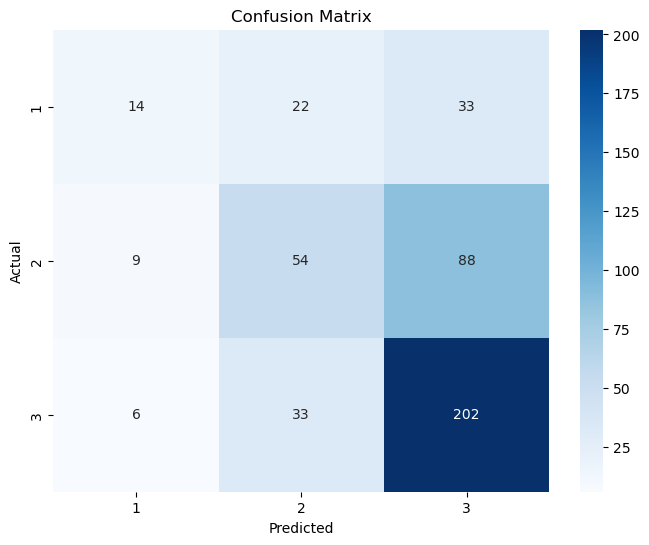

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nfl_draft = "https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv"
df = pd.read_csv(nfl_draft)

def map_round_to_day(r):
    if r == 1:
        return 1
    elif r in [2, 3]:
        return 2
    else:
        return 3

df['day'] = df['round'].apply(map_round_to_day)

columns_to_drop = ['round', 'day', 'player_name', 'school']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)
X = X.select_dtypes(include=[np.number])
y = df['day']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

##Test set
y_pred = rf.predict(X_test_scaled)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

##Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.20      0.29        69
           2       0.50      0.36      0.42       151
           3       0.63      0.84      0.72       241

    accuracy                           0.59       461
   macro avg       0.53      0.47      0.47       461
weighted avg       0.56      0.59      0.55       461



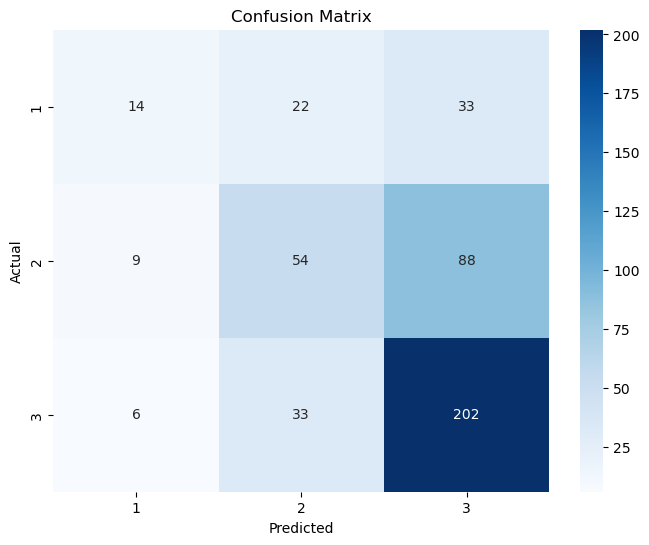

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

nfl_draft = "https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv"
df = pd.read_csv(nfl_draft)

def map_round_to_day(r):
    if r == 1:
        return 1
    elif r in [2, 3]:
        return 2
    else:
        return 3

df['day'] = df['round'].apply(map_round_to_day)

##Remove coloumns that are not needed
columns_to_drop = ['round', 'day', 'player_name', 'school']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)
X = X.select_dtypes(include=[np.number])
y = df['day']

##Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_means = X_train.mean()
X_train_filled = X_train.fillna(train_means)
X_test_filled = X_test.fillna(train_means)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

##Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? I chose to do a random forest as this data set was not linear. Random forests do well in showing non-linear relationships
 - What was your accuracy? 59%